In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")
from scipy.optimize import curve_fit
from ipywidgets import interact

In [22]:
campo1 = np.genfromtxt("data1.csv", usecols= 4)
campo2 = np.genfromtxt("data2.csv", usecols= 4, skip_header=44)
campo3 = np.genfromtxt("data3.csv", usecols= 4)
campo4 = np.genfromtxt("data4.csv", usecols= 4)
campo5 = np.genfromtxt("data5.csv", usecols= 4)
campo6 = np.genfromtxt("data6.csv", usecols= 4)
campo7 = np.genfromtxt("data7.csv", usecols= 4)
campo8 = np.genfromtxt("data8.csv", usecols= 4)
campo9 = np.genfromtxt("data9.csv", usecols= 4)
campo10 = np.genfromtxt("data10.csv", usecols= 4)

list_campos = [campo1, campo2, campo3, campo4, campo5, campo6, campo7, campo8, campo9, campo10]


temp = np.genfromtxt("temp.txt")
# print(len(campo3))

In [35]:
list_promd = list()
for i in list_campos:
    promd = np.mean(i)
    list_promd = list_promd + [promd]


print(temp)
print(list_promd) 


[  5.3  13.3  26.6  36.5  46.5  55.3  63.3  79.1  89.2 100.4]
[1715.291803245098, 1670.8448250700524, 1486.0043116073298, 1364.352311059754, 1306.0519646723337, 1235.4659322363066, 1209.075035994275, 828.3688363181159, 777.3562757705128, 709.4047822071834]


In [21]:

# plt.scatter(temp, list_promd)
# plt.errorbar(temp, list_promd, xerr = )
# plt.xlabel("Temperatura [°C]")
# plt.ylabel("Promedio campo magnético")
# plt.title("Campo magnético vs temperatura")

In [9]:
def f(x,A,B):
    return A*np.exp(-B*x)

In [48]:
A_opt, B_opt = curve_fit(f, temp, list_promd)[0] #entrega los paramétros A y B, (función fácil)

print(A_opt)
print(B_opt)

1875.7542056147468
0.008843638036850131


C:\Users\martina\AppData\Local\Temp\ipykernel_13956\3585304163.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-B*x)


In [47]:
from scipy.optimize import leastsq

def res(p, x, y):
    return y - (p[0]*np.exp(-p[1]*x)) 

p_init = [1876.0, 0.01]



A_opt2, B_opt2 = leastsq(res, p_init, args=(temp, list_promd))[0] 
print(A_opt2)
print(B_opt2)

1875.7548483587902
0.008843647453844193


#### Primer ajuste

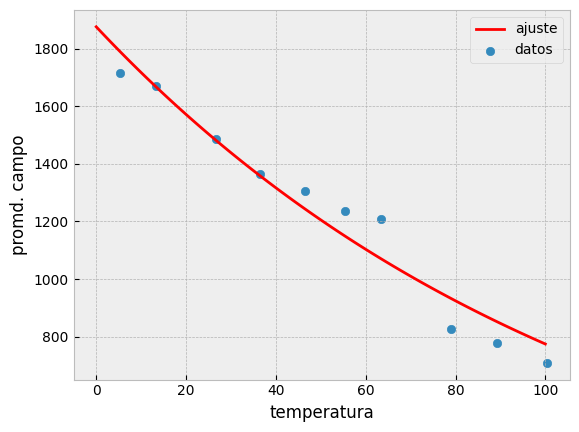

In [54]:
# g(A_opt, B_opt)
xx = np.linspace(0,100,100)
A = A_opt2
B = B_opt2

plt.plot(xx,  f(xx, A, B), color='red', label='ajuste')   
plt.scatter(temp, list_promd, label ='datos')
plt.xlabel('temperatura')
plt.ylabel('promd. campo')
plt.legend()
plt.grid(True)


In [50]:
a1, a0 = np.polyfit(temp, list_promd, 1)
print("pendiente = ", a1)
print("coef. de posición = ", a0)

pendiente =  -11.082270722436297
coef. de posición =  1801.5126635596878


In [51]:
St = np.sum((list_promd-np.mean(list_promd))**2)
res = list_promd-a0-a1*temp
Sr = np.sum((res)**2)
r2 = (St-Sr)/ St
print('coef. de determinación = ', r2)

coef. de determinación =  0.9757778991731941


#### Gráfica de residuos

Text(0, 0.5, '$\\epsilon_i = y_i-f(x_i)$')

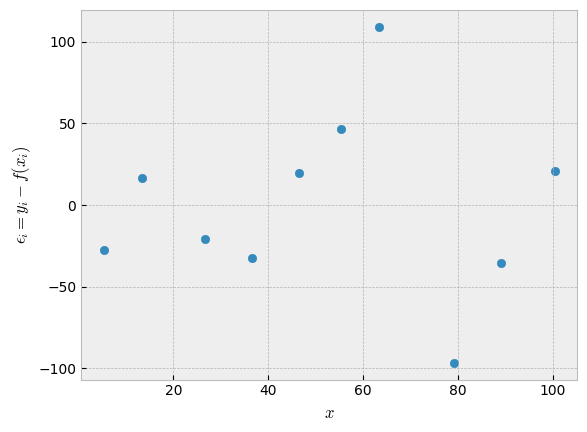

In [52]:
plt.scatter(temp, res)
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$\\epsilon_i = y_i-f(x_i)$')

#### Desviación estándar de cada campo.

In [42]:
list_desv = list()
for i in list_campos:
    desv = round(np.std(i), 3)
    # print(desv)
    list_desv = list_desv + [desv]

# m = round(np.mean(list_desv),3)    


list_desv

[0.671, 4.147, 0.677, 0.999, 1.474, 1.702, 2.013, 2.502, 1.02, 1.033]

#### Gráfica junto con su error

C:\Users\martina\AppData\Local\Temp\ipykernel_1948\283734583.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(temp, list_promd, xerr = 0.05, yerr= list_desv, color = "red", label= "error x: 0.05,  error y: ",  fmt="ob", capsize=10)


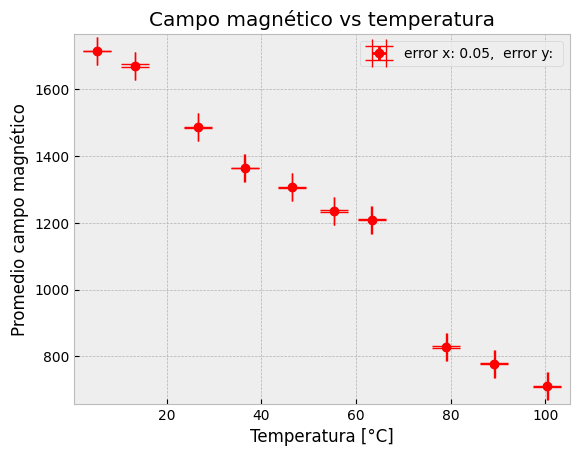

In [52]:
plt.scatter(temp, list_promd)
plt.errorbar(temp, list_promd, xerr = 0.05, yerr= list_desv, color = "red", label= "error x: 0.05,  error y: ",  fmt="ob", capsize=10)
plt.xlabel("Temperatura [°C]")
plt.ylabel("Promedio campo magnético")
plt.title("Campo magnético vs temperatura")
plt.legend()